*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [235]:
# Import libraries. You may or may not use all of these.
#!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [236]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [237]:
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [238]:
#display(dataset.sample())
display(dataset.info())
display(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [239]:
dataset = dataset.drop_duplicates()

In [240]:
X = dataset.drop(columns=['expenses'])
y = dataset['expenses']

In [241]:
display(X.sex.value_counts())
display(X.smoker.value_counts())
display(X.region.value_counts())

male      675
female    662
Name: sex, dtype: int64

no     1063
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [242]:
from sklearn.preprocessing import OneHotEncoder
display(test_dataset.head)
binary_encoder = OneHotEncoder(sparse=False, drop='first')
X['sex'], X['smoker'] = binary_encoder.fit_transform(X[['sex', 'smoker']]).T
X.head()

<bound method NDFrame.head of       age  sex   bmi  children  smoker   ne   nw   se   sw
900    49  1.0  22.5         0     0.0  1.0  0.0  0.0  0.0
1064   29  0.0  25.6         4     0.0  0.0  0.0  0.0  1.0
1256   51  0.0  36.4         3     0.0  0.0  1.0  0.0  0.0
298    31  1.0  34.4         3     1.0  0.0  1.0  0.0  0.0
237    31  1.0  38.4         2     0.0  0.0  0.0  1.0  0.0
...   ...  ...   ...       ...     ...  ...  ...  ...  ...
534    64  1.0  40.5         0     0.0  0.0  0.0  1.0  0.0
542    63  0.0  36.3         0     0.0  0.0  0.0  1.0  0.0
760    22  0.0  34.6         2     0.0  1.0  0.0  0.0  0.0
1284   61  1.0  36.3         1     1.0  0.0  0.0  0.0  1.0
1285   47  0.0  24.3         0     0.0  1.0  0.0  0.0  0.0

[268 rows x 9 columns]>

,age,sex,bmi,children,smoker,region
0,19,0.0,27.9,0,1.0,southwest
1,18,1.0,33.8,1,0.0,southeast
2,28,1.0,33.0,3,0.0,southeast
3,33,1.0,22.7,0,0.0,northwest
4,32,1.0,28.9,0,0.0,northwest


In [243]:
display(dataset['region'].unique())
display(test_dataset.head)

cat_encoder = OneHotEncoder(sparse = False) # Instanciate encoder
X["ne"], X["nw"], X['se'], X['sw'] = cat_encoder.fit_transform(X[['region']]).T

X.head()
X = X.drop(columns='region')

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<bound method NDFrame.head of       age  sex   bmi  children  smoker   ne   nw   se   sw
900    49  1.0  22.5         0     0.0  1.0  0.0  0.0  0.0
1064   29  0.0  25.6         4     0.0  0.0  0.0  0.0  1.0
1256   51  0.0  36.4         3     0.0  0.0  1.0  0.0  0.0
298    31  1.0  34.4         3     1.0  0.0  1.0  0.0  0.0
237    31  1.0  38.4         2     0.0  0.0  0.0  1.0  0.0
...   ...  ...   ...       ...     ...  ...  ...  ...  ...
534    64  1.0  40.5         0     0.0  0.0  0.0  1.0  0.0
542    63  0.0  36.3         0     0.0  0.0  0.0  1.0  0.0
760    22  0.0  34.6         2     0.0  1.0  0.0  0.0  0.0
1284   61  1.0  36.3         1     1.0  0.0  0.0  0.0  1.0
1285   47  0.0  24.3         0     0.0  1.0  0.0  0.0  0.0

[268 rows x 9 columns]>

In [244]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
def modelbuilt():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[train_dataset.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

model = modelbuilt()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                320       
                                                                 
 dense_34 (Dense)            (None, 64)                2112      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [246]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience = 100, restore_best_weights=True)

history = model.fit(train_dataset, train_labels, epochs = 750, validation_split = 0.2, verbose = 0, callbacks = [earlystop])

In [247]:
mae = history.history['mae']
val_mae = history.history['val_mae']
mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.history['mae']))

In [248]:
epochs_range

range(0, 750)

9/9 - 0s - loss: 28987600.0000 - mae: 3443.4631 - mse: 28987600.0000 - 156ms/epoch - 17ms/step
Testing set Mean Abs Error: 3443.46 expenses
You passed the challenge. Great job!


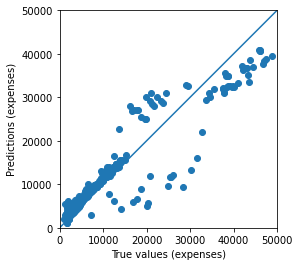

In [249]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
